<a href="https://colab.research.google.com/github/vaishnavichoudhari0418/DeepLearningp/blob/main/DL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Dataset: Low noise, small sample  (n=30, noise=0.1)
 degree  train_mse     test_mse
      1   0.178107     0.080677
      3   0.014810     0.033660
      5   0.008039     0.037177
      9   0.007241     0.023514
     15   0.001966 50272.739765


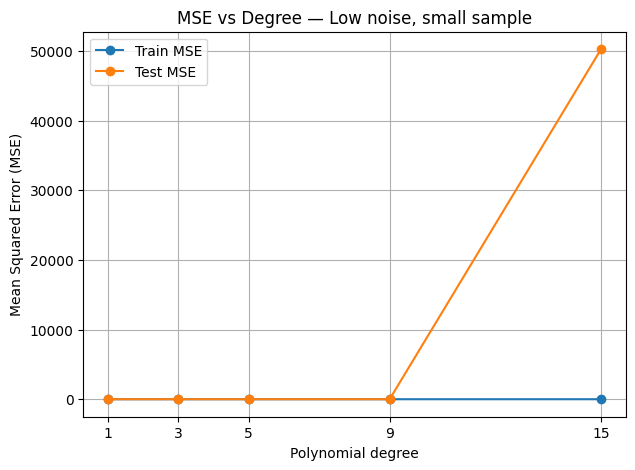

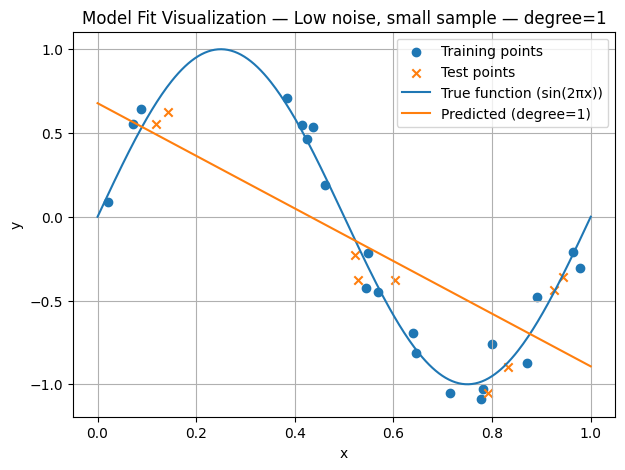

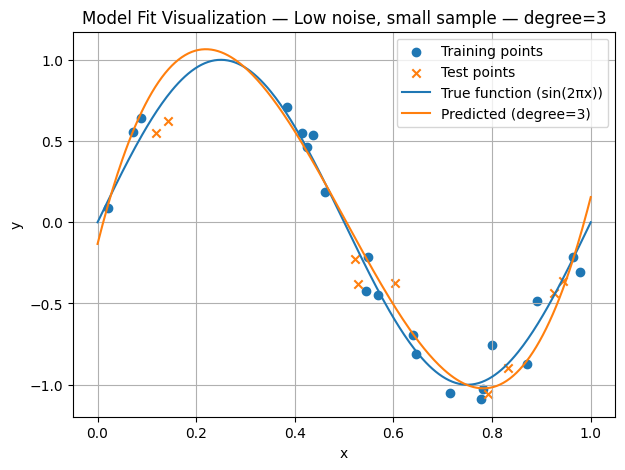

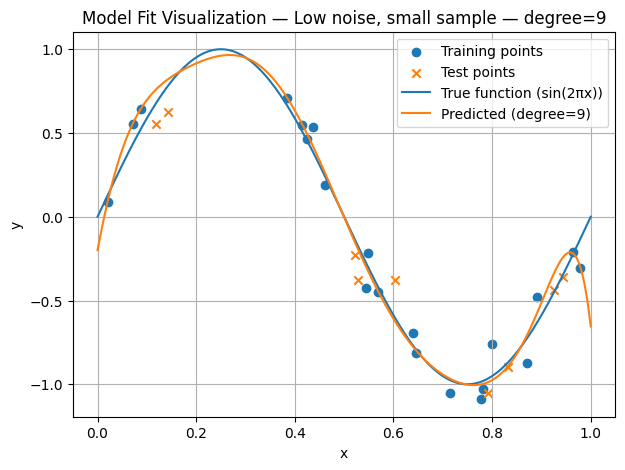


Dataset: High noise, small sample  (n=30, noise=0.5)
 degree  train_mse     test_mse
      1   0.370109 6.156346e-01
      3   0.176390 1.279148e-01
      5   0.148238 3.444595e-01
      9   0.070589 2.815998e+01
     15   0.041388 5.987387e+08


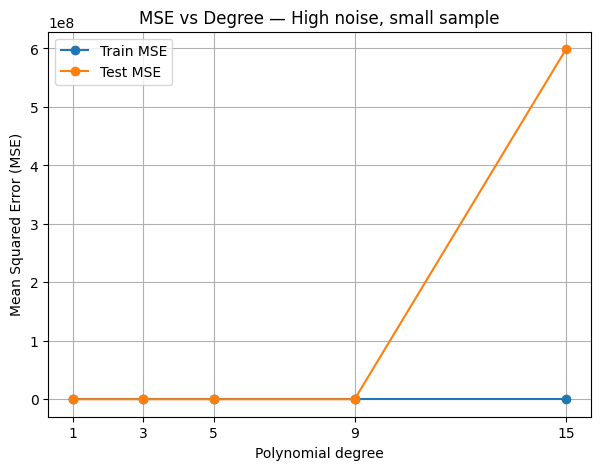

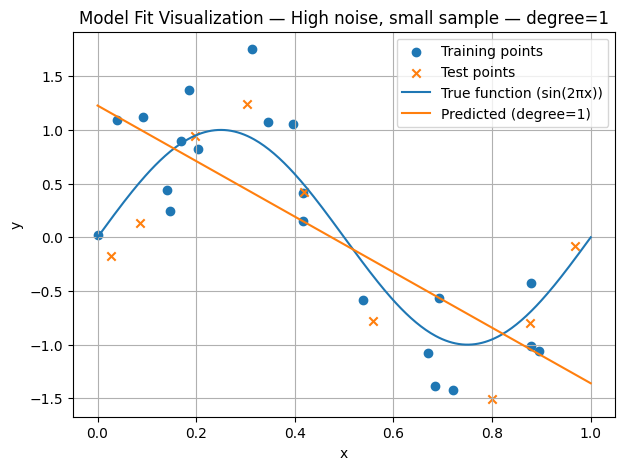

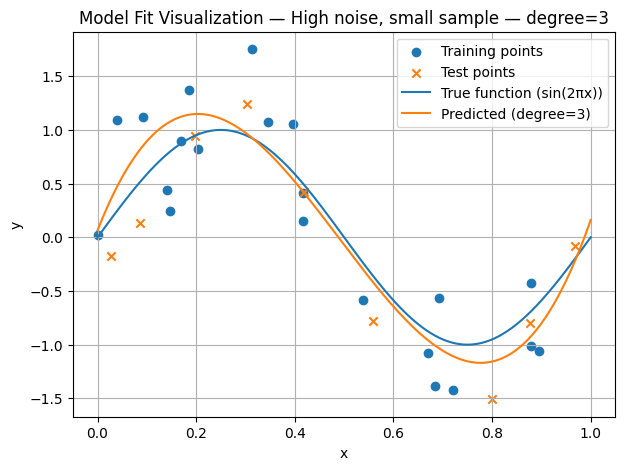

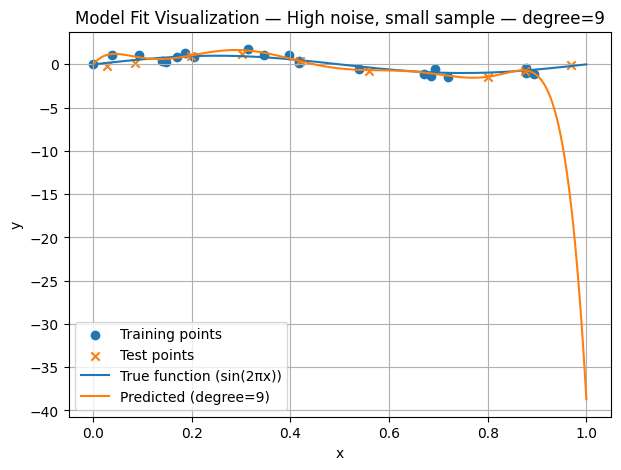


Dataset: Low noise, large sample  (n=100, noise=0.1)
 degree  train_mse  test_mse
      1   0.196995  0.179397
      3   0.012997  0.021247
      5   0.010870  0.015430
      9   0.010254  0.018597
     15   0.009041  0.032321


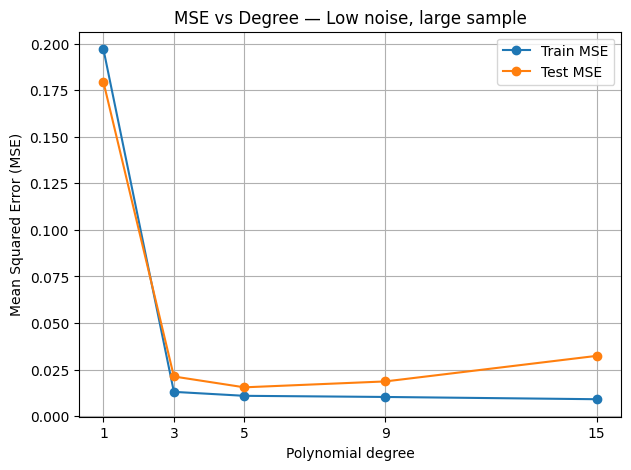

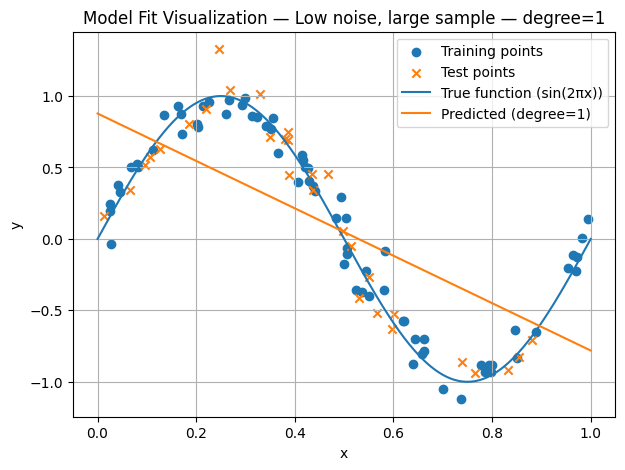

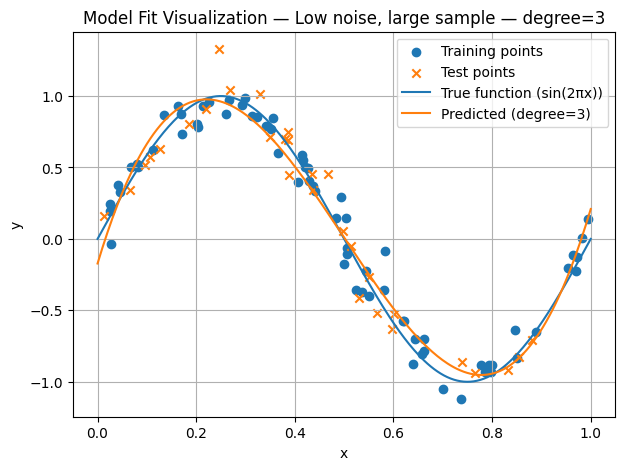

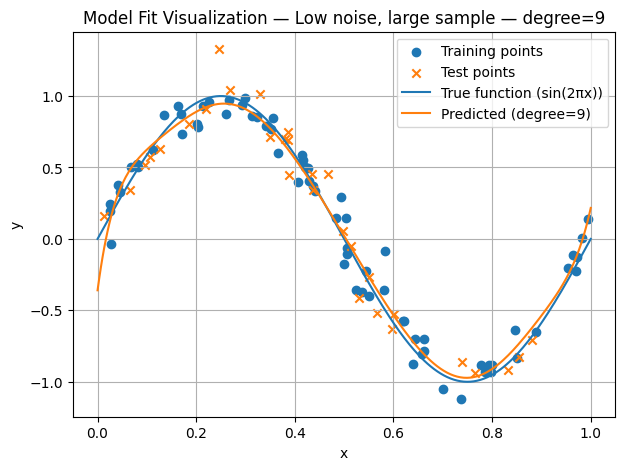


Best degree by lowest test MSE per dataset:
Low noise, small sample: degree 9, test MSE=0.0235
High noise, small sample: degree 3, test MSE=0.1279
Low noise, large sample: degree 5, test MSE=0.0154


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Function to generate synthetic sinusoidal dataset
def generate_sinusoidal(n_samples=30, noise=0.1, random_state=None):
    rng = np.random.RandomState(random_state)
    X = rng.rand(n_samples, 1)
    y = np.sin(2 * np.pi * X).ravel() + rng.normal(0, noise, size=n_samples)
    return X, y

# Run experiment for given dataset configuration
def run_experiment(config):
    name = config["name"]
    n = config["n"]
    noise = config["noise"]
    rs = config.get("random_state", 0)
    degrees = config.get("degrees", [1, 3, 5, 9, 15])

    # Generate train/test data
    X, y = generate_sinusoidal(n_samples=n, noise=noise, random_state=rs)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rs)

    train_mse_list = []
    test_mse_list = []
    preds_for_plot = {}

    # Grid for plotting predictions
    x_plot = np.linspace(0, 1, 300).reshape(-1, 1)
    y_true_plot = np.sin(2 * np.pi * x_plot).ravel()

    for d in degrees:
        poly = PolynomialFeatures(degree=d, include_bias=True)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        X_plot_poly = poly.transform(x_plot)

        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)

        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)

        train_mse_list.append(train_mse)
        test_mse_list.append(test_mse)

        y_plot_pred = model.predict(X_plot_poly)
        preds_for_plot[d] = (x_plot.ravel(), y_plot_pred)

    # Summary table
    summary_df = pd.DataFrame({
        "degree": degrees,
        "train_mse": train_mse_list,
        "test_mse": test_mse_list
    })
    print(f"\nDataset: {name}  (n={n}, noise={noise})")
    print(summary_df.to_string(index=False))

    # Plot train vs test MSE
    plt.figure(figsize=(7, 5))
    plt.plot(summary_df["degree"], summary_df["train_mse"], marker='o', label="Train MSE")
    plt.plot(summary_df["degree"], summary_df["test_mse"], marker='o', label="Test MSE")
    plt.title(f"MSE vs Degree — {name}")
    plt.xlabel("Polynomial degree")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.xticks(summary_df["degree"])
    plt.legend()
    plt.grid(True)
    plt.show()

    # Visualize fits for some degrees (underfit, good fit, overfit)
    for d in [1, 3, 9]:
        if d in degrees:
            xp, yp = preds_for_plot[d]
            plt.figure(figsize=(7, 5))
            plt.scatter(X_train.ravel(), y_train, label="Training points", marker='o')
            plt.scatter(X_test.ravel(), y_test, label="Test points", marker='x')
            plt.plot(x_plot.ravel(), y_true_plot, label="True function (sin(2πx))")
            plt.plot(xp, yp, label=f"Predicted (degree={d})")
            plt.title(f"Model Fit Visualization — {name} — degree={d}")
            plt.xlabel("x")
            plt.ylabel("y")
            plt.legend()
            plt.grid(True)
            plt.show()

    return summary_df

# =========================
# Run experiments
# =========================
configs = [
    {"name": "Low noise, small sample", "n": 30, "noise": 0.1, "random_state": 0},
    {"name": "High noise, small sample", "n": 30, "noise": 0.5, "random_state": 1},
    {"name": "Low noise, large sample", "n": 100, "noise": 0.1, "random_state": 2},
]

all_results = {}
for cfg in configs:
    summary = run_experiment(cfg)
    all_results[cfg["name"]] = summary

# Find best degree per dataset
print("\nBest degree by lowest test MSE per dataset:")
for name, df in all_results.items():
    best_row = df.loc[df["test_mse"].idxmin()]
    print(f"{name}: degree {int(best_row['degree'])}, test MSE={best_row['test_mse']:.4f}")
